<a href="https://colab.research.google.com/github/lmquann/leminhquan/blob/main/Pandas04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Câu 1: Xác định các thư viện cần dùng cho quá trình phân tích thống kê mô tả và đưa vào mã lệnh
(sử dụng Google Colab)

Các thư viện cần dùng: numpy, scipy, pandas, matplotlib

In [14]:
import numpy as np
import scipy 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from matplotlib.ticker import PercentFormatter


Câu 2: Sử dụng tập dữ liệu Aircraft Wildlife Strikes, 1990-2015 để tiến hành phân tích thống kê
mô tả.

Đọc dữ liệu

In [3]:
data = pd.read_csv('/content/database.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Câu 3: Đối với các cột dữ liệu định lượng, hãy áp dụng các phép tính hướng tâm, phép tính phương
sai – độ lệch chuẩn, các phép tính phân vị, cực đại – cực tiểu để tính các thông số cơ bản của các
cột dữ liệu định lượng này.

In [ ]:
data

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49.0,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10.0,...,1,0,0,0,0,0,0,0,0,0


Câu 4: Hãy vẽ biểu đồ boxplot cho từng cột dữ liệu định lượng và xác định xem có xuất hienj các
ngoại lệ không?nếu có thì ở cột nào?

<function matplotlib.pyplot.show>

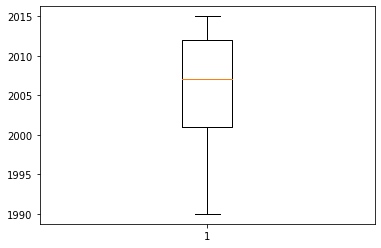

In [ ]:
Year = data['Incident Year']
Year
plt.boxplot(Year)
plt.show

<function matplotlib.pyplot.show>

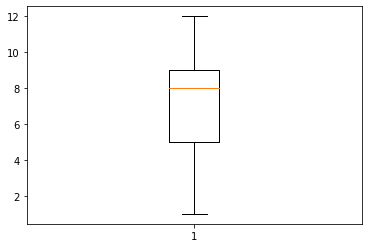

In [ ]:
Month = data['Incident Month']
plt.boxplot(Month)
plt.show

<function matplotlib.pyplot.show>

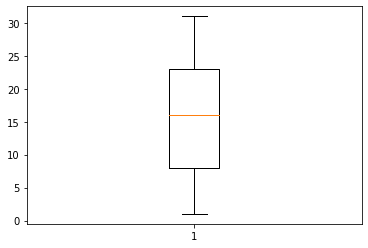

In [ ]:
Day = data['Incident Day']
plt.boxplot(Day)
plt.show

In [ ]:
Make = data['Aircraft Make']
#Loại bỏ các phần tử ngoại lệ:
Make.dropna()
Make


0         148
1         583
3         345
4         561
5         583
         ... 
174099    148
174100    148
174101    226
174102    303
174103    188
Name: Aircraft Make, Length: 131051, dtype: object

In [ ]:
Make = Make.head(20)
Make

0     148
1     583
3     345
4     561
5     583
9     303
10    148
12    443
13    561
14    148
15    583
16    148
17    561
18    561
19    729
20    729
23    583
24    561
25    148
26    395
Name: Aircraft Make, dtype: object

Câu 5: Người ta thường sử dụng chỉ số z (hay z-score) để xác định giá trị ngoại lệ (outlier). Bạn
hãy loại bỏ các hàng có chứa giá trị ngoại lệ ra khỏi dataframe.
Gợi ý: sử dụng chỉ số z hoặc hàm tính phân vị (quantile)

In [5]:
for i in ["Engines","Height", "Speed", "Distance", "Fatalities", "Injuries"]:
  mean = data[i].mean()
  data[i] = data[i].fillna(mean)

In [6]:
data[["Engines","Height", "Speed", "Distance", "Fatalities", "Injuries"]]

,Engines,Height,Speed,Distance,Fatalities,Injuries
0,2.000000,771.76298,138.819189,0.394178,1.142857,1.238462
1,2.000000,0.00000,138.819189,0.000000,1.142857,1.238462
2,2.107551,771.76298,138.819189,0.000000,1.142857,1.238462
3,2.000000,200.00000,138.000000,0.394178,1.142857,1.238462
4,2.107551,100.00000,200.000000,0.394178,1.142857,1.238462
...,...,...,...,...,...,...
53985,2.000000,771.76298,138.819189,0.394178,1.142857,1.238462
53986,2.000000,0.00000,120.000000,0.000000,1.142857,1.238462
53987,2.000000,0.00000,140.000000,0.000000,1.142857,1.238462
53988,2.107551,771.76298,138.819189,0.000000,1.142857,1.238462


In [8]:
data_2 = data[["Engines","Height", "Speed", "Distance", "Fatalities", "Injuries"]]
abs_z_scores = np.abs(st.zscore(data_2))
data_2 = data_2[(abs_z_scores < 3).all(axis=1)]

Câu 6: Thực hiện lại câu 3 – 4 với tập dữ liệu sau khi đã loại bỏ ngoại lệ.

In [9]:
data_2.describe()

,Engines,Height,Speed,Distance,Fatalities,Injuries
count,49817.000000,49817.000000,49817.000000,49817.000000,4.981700e+04,4.981700e+04
mean,2.051754,546.294455,135.764261,0.240248,1.142857e+00,1.238462e+00
std,0.375492,744.325488,24.542745,0.332141,4.836180e-13,1.544114e-12
min,1.000000,0.000000,45.000000,0.000000,1.142857e+00,1.238462e+00
25%,2.000000,0.000000,134.000000,0.000000,1.142857e+00,1.238462e+00
50%,2.000000,300.000000,138.819189,0.394178,1.142857e+00,1.238462e+00
75%,2.107551,771.762980,138.819189,0.394178,1.142857e+00,1.238462e+00
max,3.000000,5200.000000,235.000000,6.000000,1.142857e+00,1.238462e+00


Vẽ boxplot

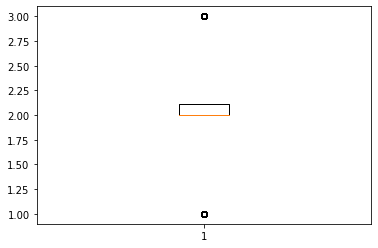

In [10]:
plt.boxplot(data_2["Engines"])

{'boxes': [<matplotlib.lines.Line2D at 0x7fc677136d50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc67713ddd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc677143e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6771438d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc67713d350>,
  <matplotlib.lines.Line2D at 0x7fc67713d890>]}

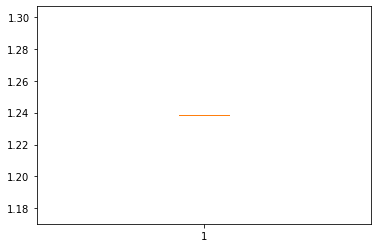

In [12]:
plt.boxplot(data_2["Injuries"])

Câu 7: Hãy tính độ tương quan (correlation) giữa các cột định lượng. (Hay xây dựng correlation
matrix)

In [13]:
cor = data_2.corr(method='pearson')
cor

,Engines,Height,Speed,Distance,Fatalities,Injuries
Engines,1.000000,0.027567,0.261688,-0.022289,NaN,NaN
Height,0.027567,1.000000,0.485824,0.298183,NaN,NaN
Speed,0.261688,0.485824,1.000000,0.170873,NaN,NaN
Distance,-0.022289,0.298183,0.170873,1.000000,NaN,NaN
Fatalities,NaN,NaN,NaN,NaN,NaN,NaN
Injuries,NaN,NaN,NaN,NaN,NaN,NaN


Câu 8: Từ correlation matrix, Hãy vẽ:
- Heat map (biểu đồ nhiệt)
- Pair plot (biểu đồ cặp)

Heat map:

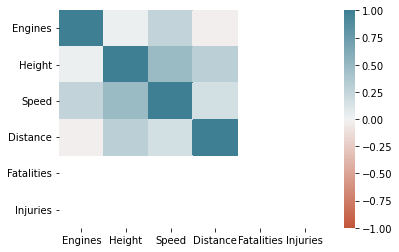

In [15]:
sns.heatmap(cor, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

Pair plot:

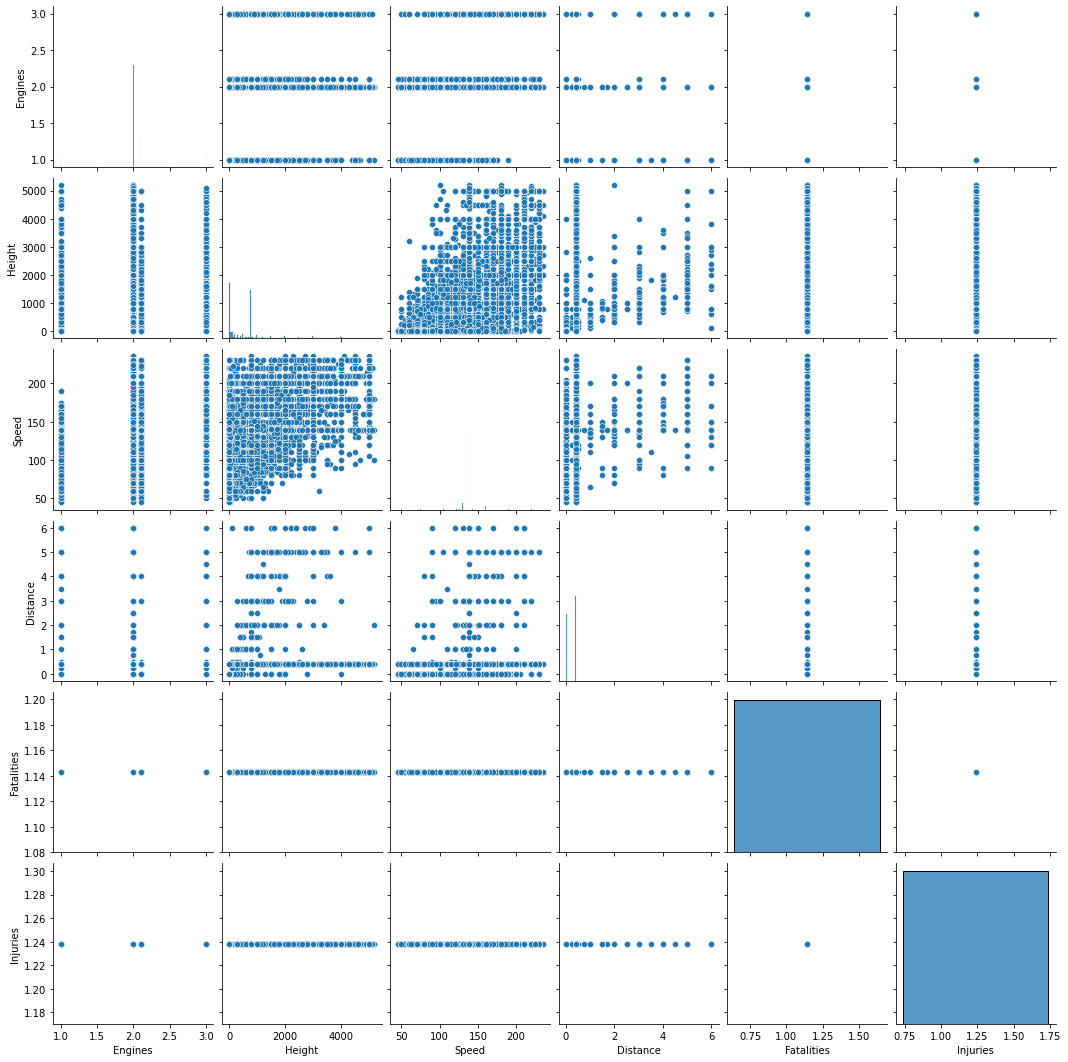

In [16]:
sns.pairplot(data_2)

Câu 9: Đối với các cột dữ liệu định tính, hãy:
- Vẽ biểu đồ cột dạng đứng
- Vẽ biểu đồ cột dạng ngang

Biểu đồ dạng đứng

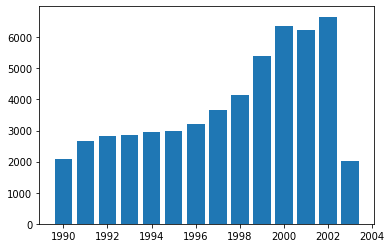

In [17]:
x = dict(data["Incident Year"].value_counts()).keys()
y = dict(data["Incident Year"].value_counts()).values()
plt.bar(x,y);

Biểu đồ dạng ngang

<BarContainer object of 14 artists>

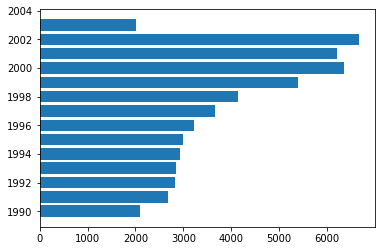

In [18]:
x = dict(data["Incident Year"].value_counts()).keys()
y = dict(data["Incident Year"].value_counts()).values()
plt.barh(list(x),list(y))